## Feature Engineering: Basic Introduction

### Introduction
'Feature engineering is the process of using domain knowledge to extract features from raw data. These features can be used to improve the performance of machine learning(ML) algorithms. Feature engineering can be considered as applied machine learning itself'.[Wikipedia](https://en.wikipedia.org/wiki/Feature_engineering)

How features and what features are presented to an ML algorithm is very important, as this would greatly influence the qaulity of the ML algorithm result/output.So much lies in the quality of the data and how data is presented.  "Gabage In, Gabage Out", "Quality In, Quality Out".

At the heart of it, a machine learning problem is a knowledge representation problem.  How the knowledge is represented would determine if or how quickly the ML algorithm would provide results.

#### How many strokes can you count?

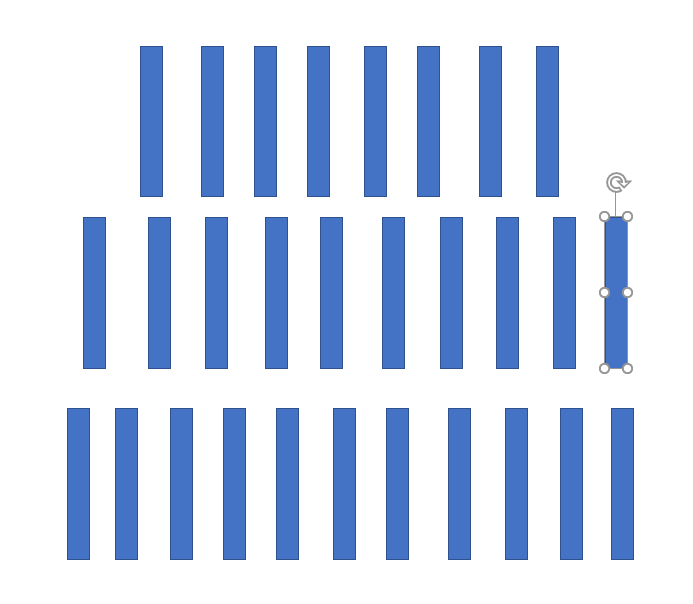

In [3]:
from IPython.display import Image
Image(filename='uncounted_strokes.PNG',width=400, height=300)

How many seconds did it take you to determine the number of strokes we have? Are there approaches we can apply to make this process rather simple or simpler? What if these strokes are grouped into groups of 5 and clustered together would it simplify the process for us?  

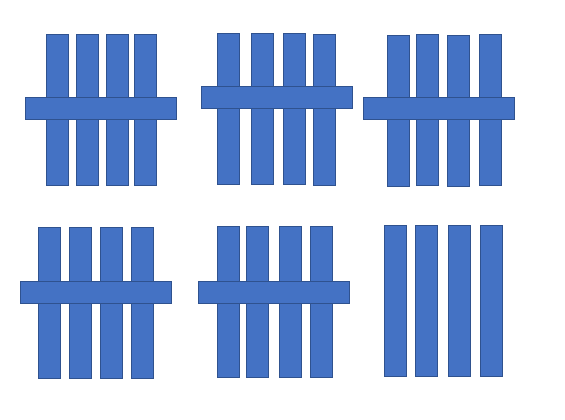

In [4]:
from IPython.display import Image
Image(filename='counted_strokes.PNG',width=400, height=300)

Feature engineering  involves the the possible approaches that is required to make  it easier to present data to a machine learning algorithm to enable it  find insights and relationships between the features and the target variables

The type of feature engineering approach we use is influenced by the type of data provided and the machine learning algorithm to be used.

In this Jupyter notebook we would focus on numeric data type, categorical data type and time series.  Other data types taht would not be considered include text, images, speech etc. 

One approach to feature engineering that is often neglected and of great importance is engaging the SME. e.g height, weight and the interaction between the two features - body mass index (BMI). BMI is a better representation of being overweight than height or weight.

Content

1. Feature Engineering Approaches
2. Feature Selection Approaches
3. References 

### Dataset

In [5]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

dataset = fetch_california_housing()

retail_analytics_dataset = pd.read_csv("clean_retail_analytics_data.csv")

In [6]:
df_features = pd.DataFrame(dataset['data'], columns=dataset['feature_names'])
df_target = dataset.target

In [7]:
df_features.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [8]:
df_features.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


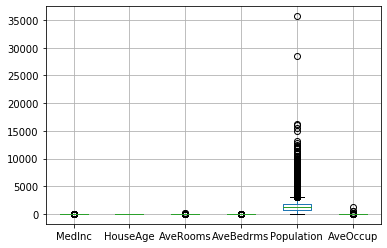

In [9]:
df_features[dataset['feature_names'][:-2]].boxplot();

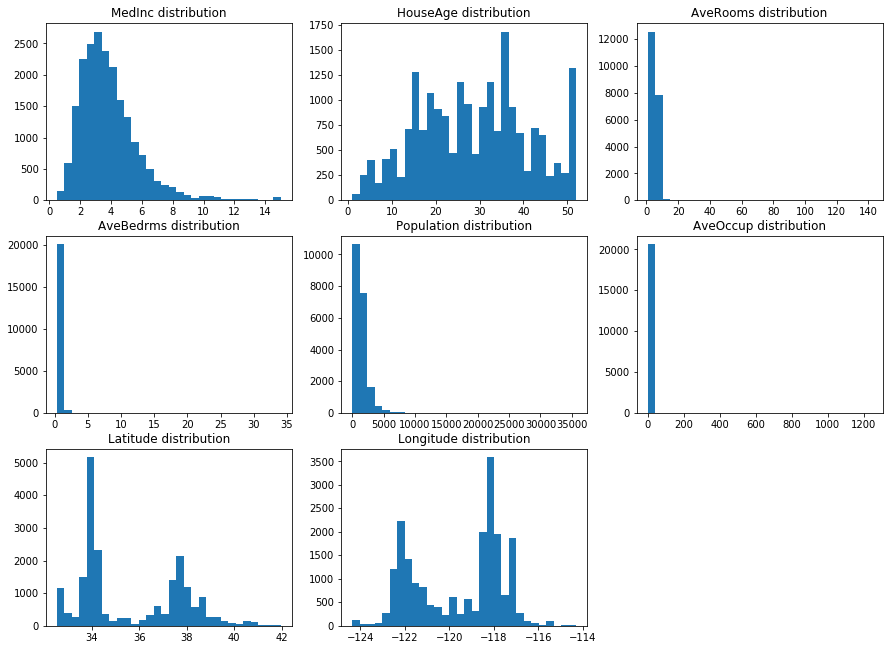

In [10]:
fig = plt.figure(figsize =(15,15))

features_columns = df_features.columns.tolist()

for x,y in enumerate(features_columns):
    plt.subplot(4,3,x+1)
    plt.hist(x=df_features[y], bins=30)
    plt.title(y + ' distribution') 

### 1. Feature Engineering Approach

a. Feature Transformation  
b. Feature Extraction/Creation 

#### a. Feature Transformation 

- Scaling
  - Normalization - tranforming range of values from between 0.0 to 1.0
  - Standardization - transforming range of value such that the mean is 0 and the standard deviation is 1
- Log Transformation - the log of a value. Other transformation like squared exist

The data range of features can have undue influence on a ML algorithm.  The impact varies per algorithm type. ML algorithms like linear regression, Support Vector machine  are influenced by this varying data range. Linear regression also expect some statistical assumption that lends itself to using standardization. Decision trees, random forest are less influenced by this.  In practice it is important the features are scaled.   

It is important to note while Normalization reduces the range of outliers "it does guarantee balanced feature scales in the presence of outliers" [Scalers & Outliers](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html) 

Generally if you expect the feature to be normally distributed you would use standardization.  In practice it does not hurt to try both approaches.  Data Science is both a science and an art.

In [11]:
# Normalization - MinMaxScaler
# Standardization - StandardScaler
# Feature Transformation - PowerTransformer
# Category variable transformation - Category
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer, OneHotEncoder

#### Original Data

In [12]:
df2 = df_features.loc[:,['MedInc', 'HouseAge', 'AveBedrms', 'Population']]
df2.head()

,MedInc,HouseAge,AveBedrms,Population
0,8.3252,41.0,1.023810,322.0
1,8.3014,21.0,0.971880,2401.0
2,7.2574,52.0,1.073446,496.0
3,5.6431,52.0,1.073059,558.0
4,3.8462,52.0,1.081081,565.0


In [13]:
df_features.loc[:,['MedInc', 'HouseAge', 'AveBedrms', 'Population']].describe().T

,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.870671,1.899822,0.499900,2.563400,3.53480,4.743250,15.000100
HouseAge,20640.0,28.639486,12.585558,1.000000,18.000000,29.00000,37.000000,52.000000
AveBedrms,20640.0,1.096675,0.473911,0.333333,1.006079,1.04878,1.099526,34.066667
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.00000,1725.000000,35682.000000


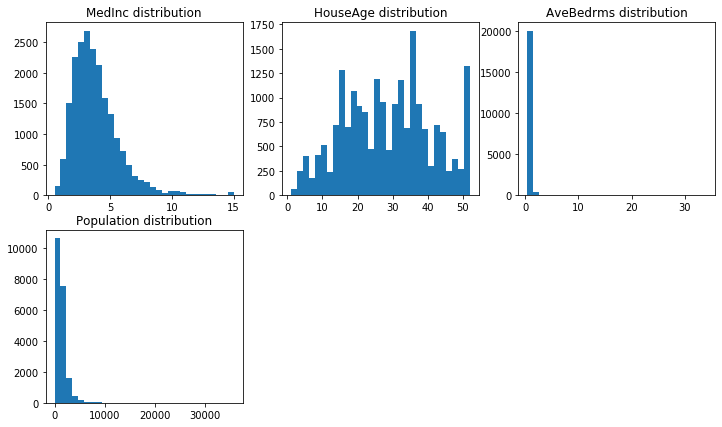

In [14]:
fig = plt.figure(figsize =(12,7))

for x,y in enumerate(['MedInc', 'HouseAge', 'AveBedrms', 'Population']):
    plt.subplot(2,3,x+1)
    plt.hist(x=df_features[y], bins=30)
    plt.title(y + ' distribution') 

#### Normalization 

In [15]:
# Scaling using sklearn

minmax = MinMaxScaler()
df_normalized = minmax.fit_transform(df2)
df_normalized = pd.DataFrame(df_normalized, columns=['MedInc', 'HouseAge', 'AveBedrms', 'Population'])
df_normalized.head()

,MedInc,HouseAge,AveBedrms,Population
0,0.539668,0.784314,0.020469,0.008941
1,0.538027,0.392157,0.018929,0.067210
2,0.466028,1.000000,0.021940,0.013818
3,0.354699,1.000000,0.021929,0.015555
4,0.230776,1.000000,0.022166,0.015752


In [16]:
df_normalized.describe().T

,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,0.232464,0.131020,0.0,0.142308,0.209301,0.292641,1.0
HouseAge,20640.0,0.541951,0.246776,0.0,0.333333,0.549020,0.705882,1.0
AveBedrms,20640.0,0.022629,0.014049,0.0,0.019943,0.021209,0.022713,1.0
Population,20640.0,0.039869,0.031740,0.0,0.021974,0.032596,0.048264,1.0


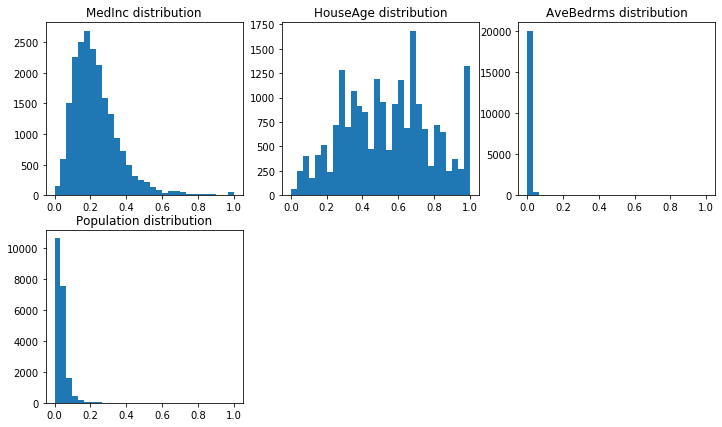

In [17]:
fig = plt.figure(figsize =(12,7))

for x,y in enumerate(df_normalized.columns.tolist()):
    plt.subplot(2,3,x+1)
    plt.hist(x=df_normalized[y], bins=30)
    plt.title(y + ' distribution') 

#### Standardization

In [18]:
# Scaling using sklearn

standard = StandardScaler()
standard.fit(df2)
df_standardized = standard.transform(df2)
df_standardized = pd.DataFrame(df_standardized, columns=['MedInc', 'HouseAge', 'AveBedrms', 'Population'])
df_standardized.head()

,MedInc,HouseAge,AveBedrms,Population
0,2.344766,0.982143,-0.153758,-0.974429
1,2.332238,-0.607019,-0.263336,0.861439
2,1.782699,1.856182,-0.049016,-0.820777
3,0.932968,1.856182,-0.049833,-0.766028
4,-0.012881,1.856182,-0.032906,-0.759847


In [19]:
df_standardized.describe().T

,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.734255e-16,1.000024,-1.774299,-0.688119,-0.176795,0.459306,5.858286
HouseAge,20640.0,8.557001e-16,1.000024,-2.196180,-0.845393,0.028646,0.664310,1.856182
AveBedrms,20640.0,-1.531384e-16,1.000024,-1.610768,-0.191172,-0.101065,0.006016,69.571713
Population,20640.0,-6.465442e-17,1.000024,-1.256123,-0.563809,-0.229132,0.264495,30.250330


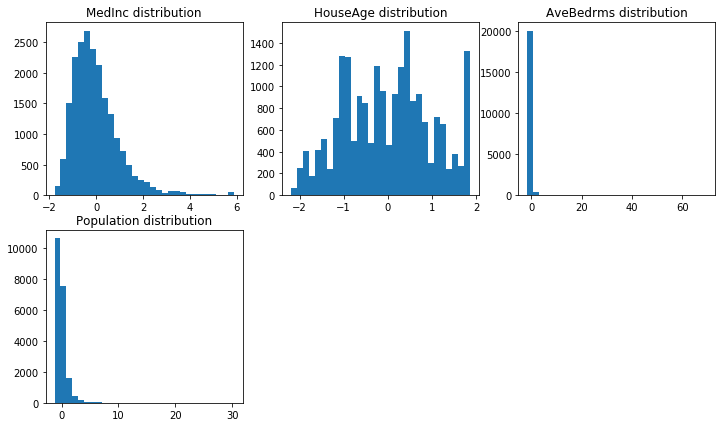

In [20]:
fig = plt.figure(figsize =(12,7))

for x,y in enumerate(df_standardized.columns.tolist()):
    plt.subplot(2,3,x+1)
    plt.hist(x=df_standardized[y], bins=30)
    plt.title(y + ' distribution') 

looking at the histogram of the original dataset, the nomalization and standardization would do you observe in the scaling of the distribution of the features? 

#### Transformation
- log transform
- squared transform
- Power transform (supports  Box-Cox and yeo-johnson transformation)

Tranformation help to normalize originally  skewed data. Log transfrom is most frequently used.

However when using log transform you must ensure that the values transformed are greater than zero as log(0) is undefined.Numpy caters for this by providing np.log1p 

#### log transformation

In [21]:
df_log = df2[['MedInc', 'HouseAge', 'AveBedrms', 'Population']].applymap(np.log1p)
df_log.head()

,MedInc,HouseAge,AveBedrms,Population
0,2.232720,3.737670,0.704982,5.777652
1,2.230165,3.091042,0.678988,7.784057
2,2.111110,3.970292,0.729212,6.208590
3,1.893579,3.970292,0.729025,6.326149
4,1.578195,3.970292,0.732888,6.338594


In [22]:
df_log.describe().T

,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,1.516995,0.358677,0.405398,1.270715,1.511781,1.748025,2.772595
HouseAge,20640.0,3.272124,0.531070,0.693147,2.944439,3.401197,3.637586,3.970292
AveBedrms,20640.0,0.732035,0.105412,0.287682,0.696182,0.717245,0.741712,3.557251
Population,20640.0,7.025503,0.736238,1.386294,6.669498,7.062192,7.453562,10.482430


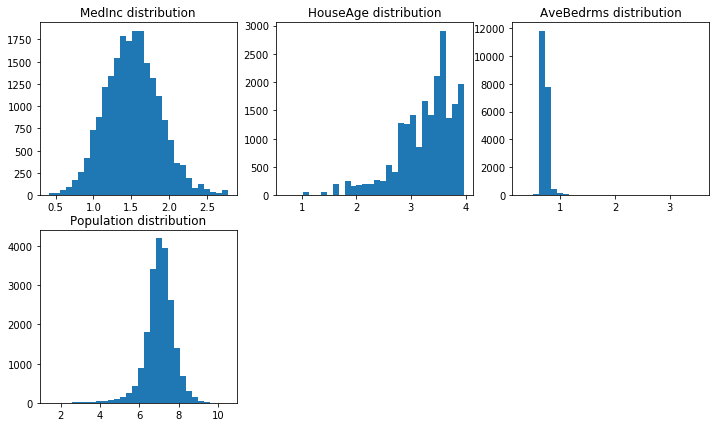

In [23]:
fig = plt.figure(figsize =(12,7))

for x,y in enumerate(['MedInc', 'HouseAge', 'AveBedrms', 'Population']):
    plt.subplot(2,3,x+1)
    plt.hist(x=df_log[y], bins=30)
    plt.title(y + ' distribution') 

#### Power Transformation

In [24]:
power = PowerTransformer()
power.fit(df2)
df_power = power.transform(df2)
df_power = pd.DataFrame(df_power, columns=['MedInc', 'HouseAge', 'AveBedrms', 'Population'])
df_power.head()

,MedInc,HouseAge,AveBedrms,Population
0,1.903289,0.975968,-0.296934,-1.619967
1,1.897081,-0.568893,-0.847336,1.090355
2,1.604361,1.761010,0.162493,-1.139853
3,1.051321,1.761010,0.159137,-1.000270
4,0.205878,1.761010,0.228006,-0.985268


In [25]:
df_power.describe().T

,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,2.427967e-16,1.000024,-3.446085,-0.670935,0.020996,0.667710,3.146572
HouseAge,20640.0,-1.244230e-15,1.000024,-2.495561,-0.820372,0.072278,0.681053,1.761010
AveBedrms,20640.0,1.873464e-14,1.000024,-24.208696,-0.476264,-0.058306,0.381042,4.251889
Population,20640.0,5.602444e-16,1.000024,-4.528522,-0.569957,-0.033590,0.552217,7.450619


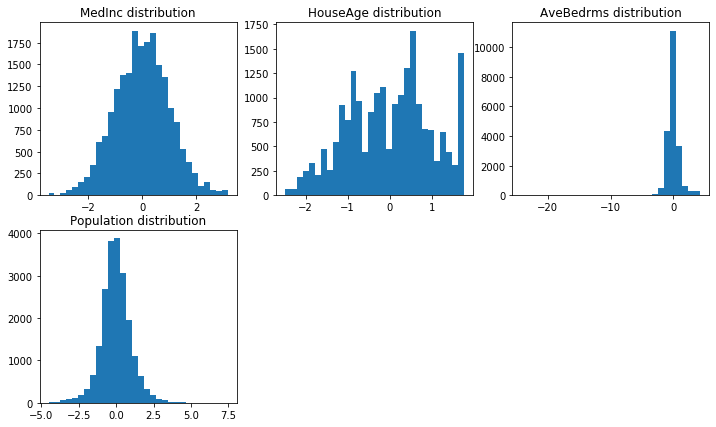

In [26]:
fig = plt.figure(figsize =(12,7))

for x,y in enumerate(df_power.columns.tolist()):
    plt.subplot(2,3,x+1)
    plt.hist(x=df_power[y], bins=30)
    plt.title(y + ' distribution') 

#### Categorical Variable transformation
1. OneHot encoding
2. Creating categorical variables from numeric variables

Categorical variables need to converted to numeric variables.  Two approaches are the label encoding and the OneHot encoding.  OneHot is most appropriate as Label encoding would introduce an order or some form of magnitude which may not exist in the dataset.  E.g. a categorical feature than contain Low, Medium, High when using Label encoding would be translated into 1,2,3 while when using OneHot encoding would be translated into [100],[010], [001]. 

In [27]:
retail_analytics_dataset.head()

,order_date,region,order_volume,order_value
0,2016-09-04,SouthEast,1,72.89
1,2016-09-05,South,1,59.50
2,2016-09-15,South,1,134.97
3,2016-10-02,SouthEast,1,100.00
4,2016-10-03,South,1,29.90


In [28]:
retail_analytics_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2194 entries, 0 to 2193
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   order_date    2194 non-null   object 
 1   region        2194 non-null   object 
 2   order_volume  2194 non-null   int64  
 3   order_value   2194 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 68.7+ KB


In [29]:
# converting features to the appropriate variable type
retail_analytics_dataset['region'] = retail_analytics_dataset['region'].astype('category')
retail_analytics_dataset['order_date'] = pd.to_datetime(retail_analytics_dataset['order_date'])

In [30]:
retail_analytics_dataset.head()

,order_date,region,order_volume,order_value
0,2016-09-04,SouthEast,1,72.89
1,2016-09-05,South,1,59.50
2,2016-09-15,South,1,134.97
3,2016-10-02,SouthEast,1,100.00
4,2016-10-03,South,1,29.90


In [31]:
retail_analytics_dataset.region.unique()

['SouthEast', 'South', 'CenterWest', 'North', 'NorthEast']
Categories (5, object): ['SouthEast', 'South', 'CenterWest', 'North', 'NorthEast']

#### OneHot Encoding

In [32]:
onehotencoder = OneHotEncoder()

onehotencoder.fit(retail_analytics_dataset[['region']])
encoded = onehotencoder.transform(retail_analytics_dataset[['region']])

In [33]:
encoded.shape

(2194, 5)

In [34]:
encoded.toarray()

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]])

In [35]:
pd.get_dummies(retail_analytics_dataset['region']).head()

,CenterWest,North,NorthEast,South,SouthEast
0,0,0,0,0,1
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,0,1
4,0,0,0,1,0


pandas provides the *pd.get_dummies* method and scikit-learn offers the *OneHotEncoder* object.  What is the difference and when is it appropraite to use either?

OneHotEncoding by scikit-learn enables us apply oneHotEncoding to new dataset using the same encoder created from previous  (original) data. pd.get_dummies does not afford that opportunity. You must transform categorical data ahead. 

#### Creating categorical variables from numeric variables

Sometimes there may be need to create a categorical variable from numeric variables.  E.g. grouping business based on their revenue as small, medium and large scale enterprise.  This can be achieved by creating bins from the numeric variables

In [36]:
df_features[['Population']].describe().T

,count,mean,std,min,25%,50%,75%,max
Population,20640.0,1425.476744,1132.462122,3.0,787.0,1166.0,1725.0,35682.0


In [37]:
df_features.isna().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

In [38]:
pd.cut(df_features.Population, [0,1000,5000,35682])

0           (0, 1000]
1        (1000, 5000]
2           (0, 1000]
3           (0, 1000]
4           (0, 1000]
             ...     
20635       (0, 1000]
20636       (0, 1000]
20637    (1000, 5000]
20638       (0, 1000]
20639    (1000, 5000]
Name: Population, Length: 20640, dtype: category
Categories (3, interval[int64]): [(0, 1000] < (1000, 5000] < (5000, 35682]]

In [39]:
df_features[['Population_group']] = pd.cut(df_features.Population, [0,1000,5000,35682], labels=['small', 'medium', 'large'])
df_features.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Population_group
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,small
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,medium
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,small
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,small
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,small


#### Feature Extraction & Creation

There are instances where you would like to create additional features from existing features. This might be extracting features from a date field, or creating features based on the interaction of already known fields

##### Datetime features

In [40]:
retail_analytics_dataset.head()

,order_date,region,order_volume,order_value
0,2016-09-04,SouthEast,1,72.89
1,2016-09-05,South,1,59.50
2,2016-09-15,South,1,134.97
3,2016-10-02,SouthEast,1,100.00
4,2016-10-03,South,1,29.90


In [41]:
# function to create date features
def quarter_checker(x):
    if x in [1,2,3]:
        # Qtr 1
        return 1
    elif x in [4,5,6]:
          # Qtr 2
        return 2
    elif x in [7,8,9]:
        # Qtr 3
        return 3
    else:
        # Qtr 4
        return 4
    
public_holidays_in_brazil = []

def date_feature_engineering(df2, column_name, drop_others=False):
    df =df2.copy()
    if drop_others:
        columns = list(df.columns)
        columns.remove(column_name)
        df.drop(columns, axis=True, inplace=True)
    df[column_name + '_year'] = df[column_name].dt.year
    df[column_name+ '_month'] = df[column_name].dt.month
    df[column_name+ '_week'] = df[column_name].dt.isocalendar().week
    df[column_name+ '_day'] = df[column_name].dt.day
    df[column_name+ '_dayofweek'] = df[column_name].dt.dayofweek

    df[column_name +'_ismonth_start'] =  df[column_name + '_day'] == 1
    
    df[column_name +'_isweekend'] =   df[column_name].dt.dayofweek.isin([5,6])
    
    df['order_quarter'] = df[column_name].dt.month.apply(lambda x: quarter_checker(x))

    
    return df

In [42]:
retail_new_features = date_feature_engineering(retail_analytics_dataset,'order_date')
retail_new_features.head()

,order_date,region,order_volume,order_value,order_date_year,order_date_month,order_date_week,order_date_day,order_date_dayofweek,order_date_ismonth_start,order_date_isweekend,order_quarter
0,2016-09-04,SouthEast,1,72.89,2016,9,35,4,6,False,True,3
1,2016-09-05,South,1,59.50,2016,9,36,5,0,False,False,3
2,2016-09-15,South,1,134.97,2016,9,37,15,3,False,False,3
3,2016-10-02,SouthEast,1,100.00,2016,10,39,2,6,False,True,4
4,2016-10-03,South,1,29.90,2016,10,40,3,0,False,False,4


#### Building ML Models using the different Transformation

In [43]:
df_features.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Population_group
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,small
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,medium
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,small
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,small
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,small


In [44]:
df_target, dataset.target_names

(array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), ['MedHouseVal'])

In [45]:
df_features.isnull().sum()

MedInc              0
HouseAge            0
AveRooms            0
AveBedrms           0
Population          0
AveOccup            0
Latitude            0
Longitude           0
Population_group    0
dtype: int64

In [46]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   MedInc            20640 non-null  float64 
 1   HouseAge          20640 non-null  float64 
 2   AveRooms          20640 non-null  float64 
 3   AveBedrms         20640 non-null  float64 
 4   Population        20640 non-null  float64 
 5   AveOccup          20640 non-null  float64 
 6   Latitude          20640 non-null  float64 
 7   Longitude         20640 non-null  float64 
 8   Population_group  20640 non-null  category
dtypes: category(1), float64(8)
memory usage: 1.3 MB


In [47]:
from sklearn.model_selection import train_test_split

df_updated = pd.get_dummies(df_features, columns=['Population_group'])
df_updated.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Population_group_small,Population_group_medium,Population_group_large
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,1,0,0
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,0,1,0
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,1,0,0
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,1,0,0
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,1,0,0


In [48]:
df_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   MedInc                   20640 non-null  float64
 1   HouseAge                 20640 non-null  float64
 2   AveRooms                 20640 non-null  float64
 3   AveBedrms                20640 non-null  float64
 4   Population               20640 non-null  float64
 5   AveOccup                 20640 non-null  float64
 6   Latitude                 20640 non-null  float64
 7   Longitude                20640 non-null  float64
 8   Population_group_small   20640 non-null  uint8  
 9   Population_group_medium  20640 non-null  uint8  
 10  Population_group_large   20640 non-null  uint8  
dtypes: float64(8), uint8(3)
memory usage: 1.3 MB


In [49]:
X_train, X_test, y_train, y_test = train_test_split(df_updated, df_target, test_size=0.30, random_state=42)

In [50]:
# a simple regression model with no transformation
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

reg = LinearRegression()

reg.fit(X_train, y_train)

print('model without scaling\n')
print('score:', reg.score(X_train, y_train))

print ('\ntraining rmse')
print(mean_squared_error(y_train, reg.predict(X_train))** 0.5)


print ('\ntest rmse')
print(mean_squared_error(y_test, reg.predict(X_test))** 0.5)

model without scaling

score: 0.6096602756957983

training rmse
0.7231435255174709

test rmse
0.7282344836207643


In [51]:
X_train.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'Population_group_small',
       'Population_group_medium', 'Population_group_large'],
      dtype='object')

In [52]:
# a simple regression model with Normalization (MinMaxScaler)
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

# transform data
minmax = MinMaxScaler()
minmax.fit(X_train)

X_train_transform = minmax.transform(X_train)
X_test_transform = minmax.transform(X_test)



reg = LinearRegression()



reg.fit(X_train_transform, y_train)

print('model  with Normalization (MinMaxScaler)\n')
print('score:', reg.score(X_train_transform, y_train))

print ('\ntraining rmse')
print(mean_squared_error(y_train, reg.predict(X_train_transform))** 0.5)


print ('\ntest rmse')
print(mean_squared_error(y_test, reg.predict(X_test_transform))** 0.5)

model  with Normalization (MinMaxScaler)

score: 0.6096602756957983

training rmse
0.7231435255174709

test rmse
0.7282344836207643


In [53]:
X_train_transform

array([[0.25043103, 0.66666667, 0.03540957, ..., 0.        , 1.        ,
        0.        ],
       [0.16297706, 0.37254902, 0.02490651, ..., 1.        , 0.        ,
        0.        ],
       [0.2553551 , 0.45098039, 0.03353176, ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.16789424, 0.68627451, 0.02196727, ..., 0.        , 1.        ,
        0.        ],
       [0.35994676, 0.2745098 , 0.03904731, ..., 0.        , 1.        ,
        0.        ],
       [0.14314285, 1.        , 0.01782502, ..., 0.        , 1.        ,
        0.        ]])

In [54]:
# a simple regression model with Standardization (StandardScaler)
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error


# transform data
standard = StandardScaler()
standard.fit(X_train)

X_train_transform_s = standard.transform(X_train)
X_test_transform_s= standard.transform(X_test)



reg = LinearRegression()



reg.fit(X_train_transform_s, y_train)

print('model  with Standardization (StandardScaler)\n')
print('score:', reg.score(X_train_transform_s, y_train))

print ('\ntraining rmse')
print(mean_squared_error(y_train, reg.predict(X_train_transform_s))** 0.5)


print ('\ntest rmse')
print(mean_squared_error(y_test, reg.predict(X_test_transform_s))** 0.5)

model  with Standardization (StandardScaler)

score: 0.6093349530532495

training rmse
0.7234448091827325

test rmse
0.7280936398245841


#### Features Interactions

In [55]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(2)
poly.fit(X_train_transform)

X_train_poly = poly.transform(X_train_transform)
X_test_poly = poly.transform(X_test_transform)

print('shape (no interaction): ', X_train_transform.shape)
print('shape (interaction): ', X_train_poly.shape)


reg = LinearRegression()


reg.fit(X_train_poly, y_train)

print('model  with interaction \n')
print('score:', reg.score(X_train_poly, y_train))

print ('\ntraining rmse')
print(mean_squared_error(y_train, reg.predict(X_train_poly))** 0.5)


print ('\ntest rmse')
print(mean_squared_error(y_test, reg.predict(X_test_poly))** 0.5)

shape (no interaction):  (14448, 11)
shape (interaction):  (14448, 78)
model  with interaction 

score: 0.6863778885728371

training rmse
0.6481961748770353

test rmse
0.6808984187488204


In [56]:
# print out features interaction
print(poly.get_feature_names())

['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x2 x10', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9', 'x4 x10', 'x5^2', 'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9', 'x5 x10', 'x6^2', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10', 'x7^2', 'x7 x8', 'x7 x9', 'x7 x10', 'x8^2', 'x8 x9', 'x8 x10', 'x9^2', 'x9 x10', 'x10^2']


### Feature Selection

Several approaches exist for future selection. We would demonstrate Stepwise selection in this notebook. Other approaches include:
- removing features with low variance
- leveraging features importance property of RandomForest
- Leveraging regularized linear regression model.
- Dimension reduction techniques like PCA

#### Sequential Feature Selection


In [57]:
from sklearn.feature_selection import SequentialFeatureSelector

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(2)
poly.fit(X_train_transform)

X_train_poly = poly.transform(X_train_transform)
X_test_poly = poly.transform(X_test_transform)

print('shape (no interaction): ', X_train_transform.shape)
print('shape (interaction): ', X_train_poly.shape)


reg = LinearRegression()

sfs = SequentialFeatureSelector(reg, scoring='neg_root_mean_squared_error')

sfs.fit(X_train_poly, y_train)


shape (no interaction):  (14448, 11)
shape (interaction):  (14448, 78)


SequentialFeatureSelector(estimator=LinearRegression(),
                          scoring='neg_root_mean_squared_error')

In [58]:
sfs.get_support()

array([False,  True,  True,  True,  True,  True, False,  True,  True,
        True, False, False,  True,  True,  True, False,  True, False,
        True,  True,  True, False,  True,  True,  True,  True,  True,
       False,  True,  True,  True, False, False,  True, False,  True,
       False, False, False,  True, False, False, False,  True, False,
       False, False,  True, False, False,  True, False, False,  True,
        True, False, False, False, False,  True,  True, False, False,
        True,  True,  True,  True, False,  True,  True, False, False,
       False, False, False, False, False, False])

In [59]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(2)
poly.fit(X_train_transform)

X_train_poly = poly.transform(X_train_transform)
X_test_poly = poly.transform(X_test_transform)

#reduce X to the selected features
X_train_poly_reduced = sfs.transform(X_train_poly) 
X_test_poly_reduced = sfs.transform(X_test_poly) 

print('shape (no interaction): ', X_train_transform.shape)
print('shape (interaction): ', X_train_poly.shape)
print('shape (interaction with feature selection): ', X_train_poly_reduced.shape)


reg = LinearRegression()
reg.fit(X_train_poly_reduced, y_train)

print('model  with interaction \n')
print('score:', reg.score(X_train_poly_reduced, y_train))

print ('\ntraining rmse')
print(mean_squared_error(y_train, reg.predict(X_train_poly_reduced))** 0.5)


print ('\ntest rmse')
print(mean_squared_error(y_test, reg.predict(X_test_poly_reduced))** 0.5)

shape (no interaction):  (14448, 11)
shape (interaction):  (14448, 78)
shape (interaction with feature selection):  (14448, 39)
model  with interaction 

score: 0.668693454415159

training rmse
0.6662207190039413

test rmse
0.6966793172918638


#### Feature Importance using Random Forest

In [60]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(random_state=42)



forest.fit(X_train_transform, y_train)

print('model  - Random Foreset \n')
print('score:', forest.score(X_train_transform, y_train))

print ('\ntraining rmse')
print(mean_squared_error(y_train, forest.predict(X_train_transform))** 0.5)


print ('\ntest rmse')
print(mean_squared_error(y_test, forest.predict(X_test_transform))** 0.5)

model  - Random Foreset 

score: 0.97230421704016

training rmse
0.19262380181128438

test rmse
0.5065042580123521


In [61]:
features_importance = pd.DataFrame(forest.feature_importances_, X_train.columns).reset_index()
features_importance.columns =['feature', 'measure']
features_importance=features_importance.sort_values('measure', ascending=True)
features_importance

,feature,measure
10,Population_group_large,0.000140
8,Population_group_small,0.000981
9,Population_group_medium,0.001016
3,AveBedrms,0.029961
4,Population,0.030846
2,AveRooms,0.047040
1,HouseAge,0.054617
7,Longitude,0.085678
6,Latitude,0.085739
5,AveOccup,0.138097


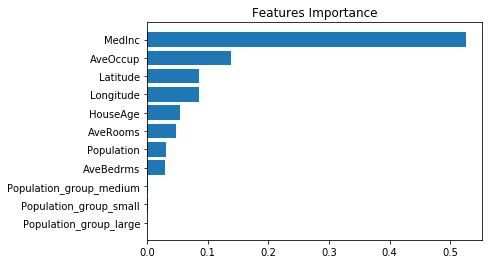

In [62]:
plt.barh('feature','measure', data=features_importance)
plt.title('Features Importance');

#### Building a Regression Model using the Importance Features Identified using Random Forest

In [63]:
# a simple regression model with Normalization (MinMaxScaler)
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

# transform data
minmax = MinMaxScaler()

importance_features = ['MedInc', 'AveOccup','Latitude', 'Longitude', 'HouseAge', 'AveRooms', 'Population', 'AveBedrms']

X_train2 = X_train.loc[:, importance_features]
X_test2 = X_test.loc[:,importance_features]

minmax.fit(X_train2)

X_train_transform2 = minmax.transform(X_train2)
X_test_transform2 = minmax.transform(X_test2)



reg = LinearRegression()



reg.fit(X_train_transform2, y_train)

print('model  with Important Features Only\n')
print('score:', reg.score(X_train_transform2, y_train))

print ('\ntraining rmse')
print(mean_squared_error(y_train, reg.predict(X_train_transform2))** 0.5)


print ('\ntest rmse')
print(mean_squared_error(y_test, reg.predict(X_test_transform2))** 0.5)

model  with Important Features Only

score: 0.609345972797216

training rmse
0.7234346057708156

test rmse
0.7284008391515452


**Reference materials**
1. [Kaggle Feature Engineering Course](https://www.kaggle.com/learn/feature-engineering)
2. [Topic 6. Feature Engineering and Feature Selection](https://www.kaggle.com/kashnitsky/topic-6-feature-engineering-and-feature-selection)
3. [Feature Selection using sklearn](https://scikit-learn.org/stable/modules/feature_selection.html)
3. [Featuretools](https://www.featuretools.com/)